## NAMA: FIDYA RIANTI PUTRI
## NIM: 09011381722116
## KELAS: SK5 BUKIT

<h1 align="center"> Prediksi Pergerakan Harga Saham Pada Bank Terbesar Di Indonesia Dengan Metode Backpropagation Neural Network </h1>

Pergerakan harga saham yang positif penting bagi perusahaan karena hal tersebut merupakan salah satu alasan utama yang mendasari para investor untuk membeli saham sebagai bentuk investasinya pada perusahaan. Saat ini bank sebagai suatu lembaga keuangan memegang peranan yang sangat penting dalam pembangunan perekonomian nasional. Oleh karenanya harga saham juga sangat berperan penting bagi suatu bank. Karena pentingnya harga saham, maka pada penelitian ini akan dilakukan suatu prediksi harga saham pada salah satu bank yaitu bank Mandiri. Untuk itu para investor memerlukan prediksi harga saham dengan menggunakan metode Back Propagation Neural Network. Hal ini sangat membantu pengambilan keputusan bagi
para investor dalam membeli saham, penerapan ArtificialNeurak Network (ANN) dapat digunakan untuk memprediksi pasar saham. ANN menunjukkan pendekatan yang efektif untuk tujuan yang bersifat umum untuk mengetahui pola, klasifikasi,
clustering dan khususnya peramalan time series dengan tingkat keakuratan yang tinggi.

## 1. Import Library

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu

Using TensorFlow backend.


Disini dijelaskan bahwa terdapat beberapa library yang digunakan, yaitu: 
- Numpy merupakan salah satu library yang digunakan untuk keperluan analisis data
- sklearn.preprocessing digunakan pada tahap Preprosesing untuk mengubah data menjadi format yang lebih efektif untuk diproses
- Matplotlib membantu untuk memvisualisasikan data dengan lebih indah dan rapi dengan sejumlah grafik berwarna
- keras.optimizers digunakan untuk mengoptimalkan sebuah data dengan fungsi Adam
- keras.model digunakan untuk memasukkan Hidden Layers (Banyaknya Jalan Pada 1 Data Ke Data Yang Lain) dengan Sequential
- keras.layer digunakan untuk banyaknya Hidden Layers yang digunakan untuk 1 Data Set (Banyaknya Cara/Jalan)
- keras.activations digunakan untuk mengubah setiap nilai input negatif menjadi 0 pada grafik

## 2. DataSet

In [2]:
dataset = np.loadtxt("BMRI224.csv", delimiter=';',dtype=float)
dataset

array([[5.013e+03, 4.975e+03, 5.075e+03, 5.013e+03, 0.000e+00],
       [5.050e+03, 5.000e+03, 5.063e+03, 5.050e+03, 1.000e+00],
       [5.088e+03, 5.025e+03, 5.100e+03, 5.088e+03, 1.000e+00],
       ...,
       [6.975e+03, 6.925e+03, 7.025e+03, 7.000e+03, 0.000e+00],
       [7.000e+03, 6.800e+03, 7.025e+03, 6.850e+03, 0.000e+00],
       [6.700e+03, 6.675e+03, 6.900e+03, 6.900e+03, 1.000e+00]])

Pada percobaan ini, data yang digunakan untuk
prediksi adalah data saham dari indeks BMRI. Prediksi
yang dilakukan terhadap data ini bersifat harian. Data
saham yang diambil dari BMRI.JK selama 1 tahun dari
1-Januari 2018. Dalam data ini terdapat beberapa atribut seperti
tanggal, harga dibuka, harga tertinggi, harga terendah,
harga penutup, harga penutup yang ditentukan. Open menunjukan harga pembukaan saham,
high menunjukan harga saham tertinggi/maksimum
pada hari tersebut, low menunjukan harga saham
terendah, close menunjukan harga penutupan.

## 3. Pengecakan Data

In [3]:
len(dataset)

957

Fungsi len disini untuk mengembalikan panjang (jumlah anggota) dari suatu objek

## 4. Menetukan Data features (x) dan labels (Y)

In [4]:
features = dataset[:, 0:4]
labels = dataset[:, 4]

Untuk data features diambil dari column 1-4 sedangkan untuk data labels digunakan column 4

In [5]:
features

array([[5013., 4975., 5075., 5013.],
       [5050., 5000., 5063., 5050.],
       [5088., 5025., 5100., 5088.],
       ...,
       [6975., 6925., 7025., 7000.],
       [7000., 6800., 7025., 6850.],
       [6700., 6675., 6900., 6900.]])

In [6]:
labels

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 0.

Dijelaskan pada column diatas bahwa labels 0 menyatakan harga saham yang turun dan labels 1 menyatakan harga saham yang naik dari harga yang telah ditentukan

## 5. Preprosessing

In [7]:
scaler = MinMaxScaler()
features_scaler = scaler.fit_transform(features)

Untuk mempreprocessing dataset diatas, saya menggunakan metode MinMaxScaler dimana metode preprocessing ini mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan.  Rentang yang diberikan untuk dataset diatas adalah 0 dan 1

## 6. Splitting Data

In [8]:
training_data, testing_data, training_label, testing_label = train_test_split(features_scaler, labels , test_size=0.2, shuffle=True, stratify=labels)

Splitting disini digunakan untuk membagi data menjadi 2 bagian yaitu training data dan testing Data

## 7. Pendefinisian Model

In [9]:
model = Sequential()
model.add(Dense(units= 100, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dense(units= 100, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 30,901
Train

Selanjutnya membuat model NN dengan 100 hiden layer pertama, 100 hiden layer kedua, 100 hiden layer ketiga dan 100 hiden layer keempat. Selain itu kita membuat output layer 1 (iya atau tidak)

## 8. Fit Model

Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model.  Dimana pada proses ini terjadi proses training dan testing. Epochs yang digunakan sebanyak 200 kali dengan batchsize 16

In [10]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=16, epochs=200)
acc_testing  = model.evaluate(testing_data, testing_label) 


Train on 765 samples, validate on 192 samples
Epoch 1/200
765/765 [==============================] - 1s 2ms/step - loss: 0.6942 - accuracy: 0.4627 - val_loss: 0.6911 - val_accuracy: 0.5573
Epoch 2/200
765/765 [==============================] - 0s 222us/step - loss: 0.6897 - accuracy: 0.5582 - val_loss: 0.6892 - val_accuracy: 0.5573
Epoch 3/200
765/765 [==============================] - 0s 267us/step - loss: 0.6895 - accuracy: 0.5582 - val_loss: 0.6880 - val_accuracy: 0.5573
Epoch 4/200
765/765 [==============================] - 0s 227us/step - loss: 0.6868 - accuracy: 0.5569 - val_loss: 0.6869 - val_accuracy: 0.5573
Epoch 5/200
765/765 [==============================] - 0s 216us/step - loss: 0.6869 - accuracy: 0.5582 - val_loss: 0.6864 - val_accuracy: 0.5573
Epoch 6/200
765/765 [==============================] - 0s 207us/step - loss: 0.6849 - accuracy: 0.5595 - val_loss: 0.6860 - val_accuracy: 0.5573
Epoch 7/200
765/765 [==============================] - 0s 219us/step - loss: 0.6873 -

765/765 [==============================] - 0s 272us/step - loss: 0.4755 - accuracy: 0.7765 - val_loss: 0.4731 - val_accuracy: 0.7812
Epoch 112/200
765/765 [==============================] - 0s 261us/step - loss: 0.4763 - accuracy: 0.7882 - val_loss: 0.4712 - val_accuracy: 0.7760
Epoch 113/200
765/765 [==============================] - 0s 262us/step - loss: 0.4830 - accuracy: 0.7621 - val_loss: 0.4682 - val_accuracy: 0.7812
Epoch 114/200
765/765 [==============================] - 0s 262us/step - loss: 0.4843 - accuracy: 0.7739 - val_loss: 0.4781 - val_accuracy: 0.8229
Epoch 115/200
765/765 [==============================] - 0s 242us/step - loss: 0.4774 - accuracy: 0.7882 - val_loss: 0.4676 - val_accuracy: 0.7969
Epoch 116/200
765/765 [==============================] - 0s 250us/step - loss: 0.4860 - accuracy: 0.7843 - val_loss: 0.4984 - val_accuracy: 0.8021
Epoch 117/200
765/765 [==============================] - 0s 262us/step - loss: 0.4703 - accuracy: 0.7882 - val_loss: 0.4662 - val_ac

Epoch 167/200
765/765 [==============================] - 0s 265us/step - loss: 0.4705 - accuracy: 0.7830 - val_loss: 0.5091 - val_accuracy: 0.7500
Epoch 168/200
765/765 [==============================] - 0s 250us/step - loss: 0.4719 - accuracy: 0.7817 - val_loss: 0.4840 - val_accuracy: 0.7500
Epoch 169/200
765/765 [==============================] - 0s 261us/step - loss: 0.4713 - accuracy: 0.7895 - val_loss: 0.4656 - val_accuracy: 0.7760
Epoch 170/200
765/765 [==============================] - 0s 254us/step - loss: 0.4673 - accuracy: 0.7895 - val_loss: 0.4574 - val_accuracy: 0.7917
Epoch 171/200
765/765 [==============================] - 0s 286us/step - loss: 0.4666 - accuracy: 0.7791 - val_loss: 0.4728 - val_accuracy: 0.8229
Epoch 172/200
765/765 [==============================] - 0s 268us/step - loss: 0.4715 - accuracy: 0.8013 - val_loss: 0.4592 - val_accuracy: 0.7917
Epoch 173/200
765/765 [==============================] - 0s 266us/step - loss: 0.4702 - accuracy: 0.7791 - val_loss: 0

## 9. Akurasi

In [11]:
print('akurasinya adalah {}'.format(acc_testing[1]*100))

akurasinya adalah 81.77083134651184


Dalam menghitung akurasi didapat akurasinya yaitu 81%

## 10. Visualisasi

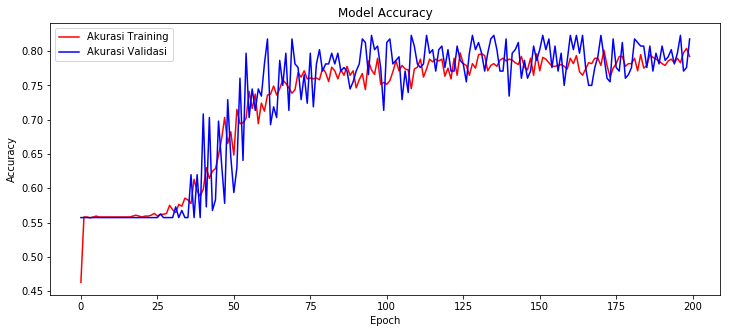

In [12]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

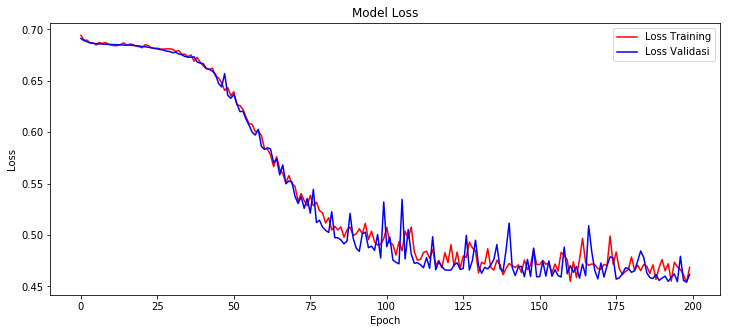

In [13]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

## 11. Confusion Matrix

Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada pengukuran kinerja menggunakan confusion matrix, terdapat 4 (empat) istilah sebagai representasi hasil proses klasifikasi yaitu :
- TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem.
- TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.
- FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.
- FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem

In [15]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [16]:
training_predicted.round()

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

Untuk dapat menghitung Confusion Matrix pada dataset yang telah diolah, kita dapat deklarasikan model predict dari data training dan data testing pada library diatas

In [17]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [18]:
training_cm

array([[353,  74],
       [ 69, 269]], dtype=int64)

In [19]:
#training
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.8130718954248366
Specificity training 0.7958579881656804
Sensitivity training 0.8266978922716628
Precision training 0.8364928909952607
F1 Score training 0.8315665488810366


Ini merupakan hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada traning

In [20]:
print(testing_cm)

[[85 22]
 [13 72]]


In [21]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.8177083333333334
Specificity testing 0.8470588235294118
Sensitivity testing 0.794392523364486
Precision testing 0.8673469387755102
F1 Score testing 0.8292682926829268


Ini merupakan hasil perolehan nilai Accuracy, Specificity, Sensitivity, Precision, dan F1 Score pada testing

## 12. Referensi
1. Paper:  Prediksi Pergerakan Harga Saham Pada Bank Terbesar Di Indonesia Dengan Metode Backpropagation Neural Network

   Link: http://ojs.stmik-banjarbaru.ac.id/index.php/jutisi/article/view/155
   
   
2. Dataset: https://finance.yahoo.com/quote/BMRI.JK/

Dataset ini diambil dari yahoo finance pada perusahaan BMRI.JK dalam waktu 3 tahun. Pada dataset tersebut diberi ubahan dimana pergerakan saham untuk label ditandai dengan :
Jika harga tutup saham kemarin lebih kecil dibanding tutup saham hari ini maka ditandai naik (1) dan jika sebaliknya maka ditandai turun (0)